In [3]:
import numpy as np
import pandas as pd

In [ ]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName('YoutubeWebApp').setMaster('spark://ec2-34-239-240-254.compute-1.amazonaws.com').setSparkHome('/opt/spark/') 
sc = SparkContext(conf=conf)


In [1]:
import ml.sparkling.graph.api.loaders.GraphLoading.LoadGraph
import ml.sparkling.graph.loaders.csv.GraphFromCsv.CSV
import ml.sparkling.graph.loaders.csv.GraphFromCsv.LoaderParameters.Indexing
import org.apache.spark.SparkContext

implicit ctx:SparkContext=???
// initialize your SparkContext as implicit value so it will be passed automatically to graph loading API

val filePath="your_graph_path.csv"

val graph=LoadGraph.from(CSV(filePath)).using(Indexing).load()

SyntaxError: invalid syntax (<ipython-input-1-ffdba9b31931>, line 6)

In [5]:
import argparse
from pyspark import SparkContext, SparkConf
from boto.s3.connection import S3Connection

def main():
    # Use argparse to handle some argument parsing
    parser.add_argument("-a",
                        "--aws_access_key_id",
                        help="AWS_ACCESS_KEY_ID, omit to use env settings",
                        default=None)
    parser.add_argument("-s",
                        "--aws_secret_access_key",
                        help="AWS_SECRET_ACCESS_KEY, omit to use env settings",
                        default=None)
    parser.add_argument("-b",
                        "--bucket_name",
                        help="AWS bucket name",
                        default="spirent-orion")
    # Use Boto to connect to S3 and get a list of objects from a bucket
    conn = S3Connection(args.aws_access_key_id, args.aws_secret_access_key)
    bucket = conn.get_bucket(args.bucket_name)
    keys = bucket.list()
    # Get a Spark context and use it to parallelize the keys
    conf = SparkConf().setAppName("MyFileProcessingApp")
    sc = SparkContext(conf=conf)
    pkeys = sc.parallelize(keys)
    # Call the map step to handle reading in the file contents
    activation = pkeys.flatMap(map_func)
    # Additional map or reduce steps go here...

def map_func(key):
    # Use the key to read in the file contents, split on line endings
    for line in key.get_contents_as_string().splitlines():
        # parse one line of json
        j = json.loads(line)
        if ("user_id" in j) & ("event") in j:
            if j['event'] == "event_we_care_about":
                yield j['user_id'], j['event']

ModuleNotFoundError: No module named 'pyspark'

In [ ]:
lines = sc.textFile("s3n://Team1FinalProject/UserUploads.csv",2)
lines = sc.textFile("s3n://Team1FinalProject/UserFileCombined_clean.csv",2)
lines.collect( )

In [6]:
from graphframes.examples import Graphs
g = Graphs(sqlContext).friends()  # Get example graph

# Run PageRank until convergence to tolerance "tol".
results = g.pageRank(resetProbability=0.15, tol=0.01)
# Display resulting pageranks and final edge weights
# Note that the displayed pagerank may be truncated, e.g., missing the E notation.
# In Spark 1.5+, you can use show(truncate=False) to avoid truncation.
results.vertices.select("id", "pagerank").show()
results.edges.select("src", "dst", "weight").show()

# Run PageRank for a fixed number of iterations.
results2 = g.pageRank(resetProbability=0.15, maxIter=10)

# Run PageRank personalized for vertex "a"
results3 = g.pageRank(resetProbability=0.15, maxIter=10, sourceId="a")
results3.saveAsTextFile()

ModuleNotFoundError: No module named 'graphframes'

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Row
import re

g = GraphFrame(v, e)

# Query: Get in-degree of each vertex.
g.inDegrees.show()

# Query: Count the number of "follow" connections in the graph.
g.edges.filter("relationship = 'follow'").count()

# Run PageRank algorithm, and show results.
results = g.pageRank(resetProbability=0.01, maxIter=20)
results.vertices.select("id", "pagerank").show()



sc = SparkContext()
sqlContext = SQLContext(sc)
peopleids = [0, 107, 1684, 1912, 3437, 348, 3980, 414, 686, 698]
featids = ["id", "birthday", "hometown_id", "work_employer_id",
    "education_school_id", "education_year_id" ]
formatter = 'com.databricks.spark.csv'
vtx = Row(*featids)

# load the entire edge and node set into a Spark DataFrame
edf = sqlContext.read.format(formatter).options(delimiter=' ', \
    header='false', inferSchema=True) \
    .load('facebook_combined.txt').withColumnRenamed( \
    'C0', 'src').withColumnRenamed('C1', 'dst')

In [10]:
import re, sys
from operator import add

from pyspark import SparkContext

def computeContribs(urls, rank):
    num_urls = len(urls)
    for url in urls:
        yield (url, rank / num_urls)


def parseNeighbors(urls):
    """Parses a urls pair string into urls pair."""
    parts = re.split(r',', urls)
    return parts[0], parts[1]


if len(sys.argv) < 3:
    print >> sys.stderr, "Usage: pagerank <master> <file> <number_of_iterations>"
    exit(-1)

# Initialize the spark context.
# Loads in input file. It should be in format of:
#     URL         neighbor URL
#     URL         neighbor URL
#     URL         neighbor URL
#     ...

#def computePageRank(inputPath,outputDir,iterations):
    
    lines = sc.textFile(inputPath)

    # Loads all URLs from input file and initialize their neighbors.
    links = lines.map(lambda urls: parseNeighbors(urls)).distinct().groupByKey().cache()

    # Loads all URLs with other URL(s) link to from input file and initialize ranks of them to one.
    ranks = links.map(lambda (url, neighbors): (url, 1.0))

    # Calculates and updates URL ranks continuously using PageRank algorithm.
    for iteration in xrange(3):
        contribs = links.join(ranks).flatMap(lambda (url, (urls, rank)):computeContribs(urls, rank))
        ranks = contribs.reduceByKey(add).mapValues(lambda rank: rank * 0.85 + 0.15)

    ranks.coalesce(1).saveAsTextFile("s3n://Team1FinalProject/VideoRelationships_ranks")

computePageRank("s3n://Team1FinalProject/VideoRelationships.csv","s3n://Team1FinalProject/VideoRelationships_ranks",4)

SyntaxError: invalid syntax (<ipython-input-10-0eccb220a1bc>, line 36)

In [4]:
import re
urls="ds.sadasd,asdfc"
re.split(r',', urls)

['ds.sadasd', 'asdfc']

In [1]:
import json
import pandas as pd
filename=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\testCurl\pageranks.json"
with open(filename,'r') as f:
    t=json.load(f)

In [2]:
videoIdlist=[]
pagerankList=[]
for x in t['results'][0]['data']:
    videoIdlist.append(x['row'][0])
    pagerankList.append(x['row'][1])


In [3]:
df=pd.DataFrame(columns=t['results'][0]['columns'])
df['videoID']=videoIdlist
df['PageRank']=pagerankList
df=df[['videoID','PageRank']]

In [4]:
df.tail()

,videoID,PageRank
1107413,PcPbf7b004Q,0.43835
1107414,90HBsxSI30c,0.43835
1107415,v4h0uqGLQ3s,0.43835
1107416,HfB3chVKLqc,0.43835
1107417,KqOcJwA254g,0.43835


In [32]:
pd.DataFrame(,names=t['results'][0]['columns'])

SyntaxError: invalid syntax (<ipython-input-32-9d2735d27fa1>, line 1)

In [17]:
MAINFILE=r'C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\MainFileCombined_clean.csv'
bitrateFile=r'C:\Users\visha\Desktop\data\Ubitrate.csv'

In [6]:
videos_df=pd.read_csv(MAINFILE)

In [7]:
joinedpageranks_df = pd.merge(videos_df,df,on='videoID',how='left')

In [8]:
joinedpageranks_df.PageRank.fillna(0.1,inplace=True)

In [135]:
joinedpageranks_df.PageRank.describe()

count    7.167945e+06
mean     2.007883e-01
std      3.719411e-01
min      1.000000e-01
25%      1.000000e-01
50%      1.000000e-01
75%      1.000000e-01
max      7.781312e+01
Name: PageRank, dtype: float64

In [47]:
joinedpageranks_df.to_csv(r'C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\MainFileCombinedWithPageRank.csv',index=False)

In [ ]:
import json
import pandas as pd

MAINFILE=r'C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\MainFileCombined_clean.csv'
DOWNPATH=r'C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\MainFileCombinedWithPageRank.csv'
pageRankFileName=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\testCurl\pageranks.json"

def combinePageRankAndDegree(pageRankFileName,MAINFILE,DOWNPATH):
    
    with open(pageRankFileName,'r') as f:
        t=json.load(f)
    videoIdlist=[]
    pagerankList=[]
    for x in t['results'][0]['data']:
        videoIdlist.append(x['row'][0])
        pagerankList.append(x['row'][1])
    df=pd.DataFrame(columns=t['results'][0]['columns'])
    df['videoID']=videoIdlist
    df['PageRank']=pagerankList
    df=df[['videoID','PageRank']]
    
    videos_df=pd.read_csv(MAINFILE)
    joinedpageranks_df = pd.merge(videos_df,df,on='videoID',how='left')
    joinedpageranks_df.PageRank.fillna(0.1,inplace=True)
    joinedpageranks_df.to_csv(DOWNPATH,index=False)
    
combinePageRankAndDegree(pageRankFileName,MAINFILE,DOWNPATH)

In [1]:
import pandas as pd

In [ ]:
import json
import pandas as pd

BetweenNessRaw=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\CurlOutputs\indegree.json"
MAINFILE=r'C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\MainFileCombinedWithPageRank.csv'
DOWNPATH=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\MainFile_W_PR_DEG.csv"

with open(BetweenNessRaw,'r') as f:
    t=json.load(f)
videoIdlistForDegree=[]
indegree=[]
t['results'][0]['data'][0]
skip=False
for x in t['results'][0]['data']:
    if skip == False:
        skip = True
    else:
        videoIdlistForDegree.append(x['row'][0])
        indegree.append(x['row'][1])
df=pd.DataFrame(columns=['videoID','InDegree'])
df['videoID']=videoIdlistForDegree
df['InDegree']=indegree

videos_df=pd.read_csv(MAINFILE,encoding="ISO-8859-1")
joinedInDegree_df = pd.merge(videos_df,df,on='videoID',how='left')
joinedInDegree_df.InDegree.fillna(0,inplace=True)
joinedInDegree_df.to_csv(DOWNPATH,index=False)


In [16]:
df.head()

,videoID,InDegree
0,LKh7zAJ4nwo,45
1,7D0Mf4Kn4Xk,65
2,n1cEq1C8oqQ,94
3,SDNkMu8ZT68,40
4,sRnLdmvQBsI,21


In [2]:
joinedInDegree_df.head()

,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments,PageRank,InDegree
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,0.65462,45
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0,0.91563,65
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0,1.06318,94
3,SDNkMu8ZT68,w00dy911,630.0,People & Blogs,186.0,10181.0,3.49,494.0,257.0,0.68903,40
4,sRnLdmvQBsI,pdrop,735.0,Entertainment,188.0,67265.0,3.09,302.0,262.0,0.10000,21


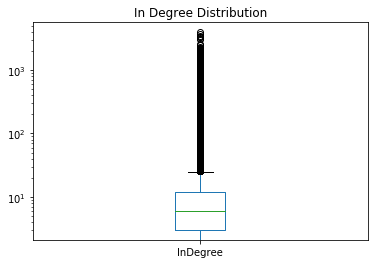

In [28]:
from matplotlib import pyplot as plt
joinedInDegree_df.InDegree.plot(kind='box',title='In Degree Distribution')
plt.yscale('log', nonposy='clip')
plt.show()

# In Degree follows a Power law distribution

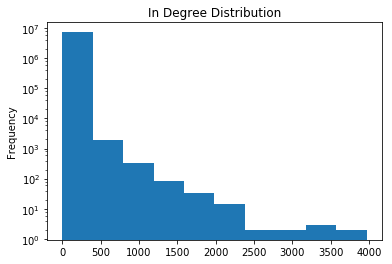

In [29]:
from matplotlib import pyplot as plt
joinedInDegree_df.InDegree.plot(kind='hist',title='In Degree Distribution')
plt.yscale('log', nonposy='clip')
plt.show()

In [27]:
joinedInDegree_df[joinedInDegree_df['InDegree'].isnull()].InDegree.sum()

0

In [5]:
UserFilePath=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\UserFileCombined_clean.csv"
userFriends_df=pd.read_csv(UserFilePath,encoding="ISO-8859-1")

In [20]:
userFriends_df.head()

,userID,uploads,friends
0,0000000000000000hate,4.0,0.0
1,0000000000000000iraq,18.0,0.0
2,000000000000000news,13.0,0.0
3,00000000000000music,11.0,0.0
4,00000000000000muslim,9.0,0.0


In [41]:
userFriends_df.friends.describe()

count    2.792603e+06
mean     1.502531e+01
std      3.311222e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      5.000000e+00
max      2.412260e+05
Name: friends, dtype: float64

# User Friends Distribution

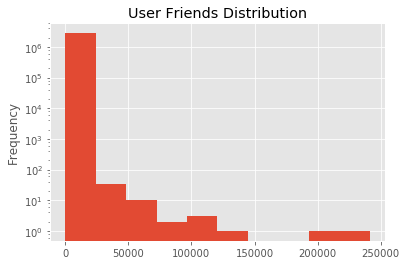

In [8]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
userFriends_df.friends.plot(kind='hist',title='User Friends Distribution')
plt.yscale('log', nonposy='clip')
plt.show()

In [33]:
userstatscols=['userID','TotalVideos','TotalViews','MaxViewedVideo','MaxViews','MinViewedVideo','MinViews','AvgViews','TotalLengthInMinutes','AvgRating','TotalRatings','TotalComments','MaxAgeInDays','MinAgeInDays','PopularityScore','TotalInDegree']
UserStatisticsPath=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\Hadoop\userstatistics.tsv"
UserStatsWithFriendsDownPath=r"C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\userstatistics.csv"

In [34]:
userstats_df=pd.read_csv(UserStatisticsPath,delimiter="\t",names=userstatscols)

In [35]:
userstats_df.head()

,userID,TotalVideos,TotalViews,MaxViewedVideo,MaxViews,MinViewedVideo,MinViews,AvgViews,TotalLengthInMinutes,AvgRating,TotalRatings,TotalComments,MaxAgeInDays,MinAgeInDays,PopularityScore,TotalInDegree
0,00000000000,1,155772,Mp0msya_knw,155772,Mp0msya_knw,155772,155772,321,4.830000,96,53,367,367,0.100000,12
1,000000000000,2,517754,gR8YwdzVaDg,504302,wvq-4bJnIlA,13452,491549,806,4.500000,414,279,529,525,0.827785,69
2,00000000000000000Jew,11,20883,hHs5h9MZwq8,5069,KHt615O218g,186,3813,3784,3.069091,227,303,763,0,0.764488,535
3,00000000000000000war,1,13,Wxh1Kiv5qxI,13,Wxh1Kiv5qxI,13,13,368,1.000000,1,1,761,761,0.100000,2
4,0000000000000000bomb,9,42173,mDjAvoNl9Jo,27200,MVQRGOi7irw,137,19884,2238,3.218888,170,150,706,0,0.152768,72


In [36]:
userstats_merged_with_friends_df=pd.merge(userstats_df,userFriends_df[['userID','friends']],how='left',on='userID')
userstats_merged_with_friends_df.friends.fillna(0,inplace=True)

In [37]:
userstats_merged_with_friends_df.head()

,userID,TotalVideos,TotalViews,MaxViewedVideo,MaxViews,MinViewedVideo,MinViews,AvgViews,TotalLengthInMinutes,AvgRating,TotalRatings,TotalComments,MaxAgeInDays,MinAgeInDays,PopularityScore,TotalInDegree,friends
0,00000000000,1,155772,Mp0msya_knw,155772,Mp0msya_knw,155772,155772,321,4.830000,96,53,367,367,0.100000,12,0.0
1,000000000000,2,517754,gR8YwdzVaDg,504302,wvq-4bJnIlA,13452,491549,806,4.500000,414,279,529,525,0.827785,69,0.0
2,00000000000000000Jew,11,20883,hHs5h9MZwq8,5069,KHt615O218g,186,3813,3784,3.069091,227,303,763,0,0.764488,535,0.0
3,00000000000000000war,1,13,Wxh1Kiv5qxI,13,Wxh1Kiv5qxI,13,13,368,1.000000,1,1,761,761,0.100000,2,0.0
4,0000000000000000bomb,9,42173,mDjAvoNl9Jo,27200,MVQRGOi7irw,137,19884,2238,3.218888,170,150,706,0,0.152768,72,0.0


In [38]:
userstats_merged_with_friends_df.friends.describe()

count    2.702390e+06
mean     1.473165e+01
std      3.348836e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      5.000000e+00
max      2.412260e+05
Name: friends, dtype: float64

In [39]:
userstats_merged_with_friends_df.to_csv(UserStatsWithFriendsDownPath,index=False)

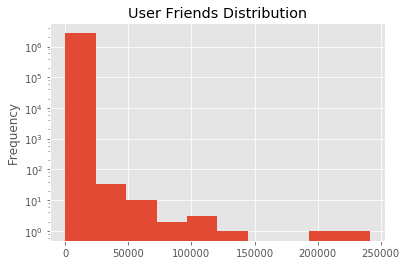

In [27]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
userstats_merged_with_friends_df.friends.plot(kind='hist',title='User Friends Distribution')
plt.yscale('log', nonposy='clip')
plt.show()

In [11]:
t['results'][0]['data'][1]['row'][1]

45

In [20]:
df_withbitrates=pd.read_csv(bitrateFile)

C:\Users\visha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [127]:
df_withbitrates

,Unnamed: 0,Unnamed: 0.1,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments,videolength,sizeinbytes,bitratekbps
0,0,0,c9hk60O9KU8,dewsaw407,782.0,Entertainment,107.0,179823.0,2.18,250.0,129.0,107.0,4372040.0,0
1,1,1,g6lR2xT0Su4,nogreen8,783.0,Entertainment,48.0,154608.0,1.85,431.0,293.0,48.0,1967244.0,322.021
2,2,2,4YHI4oQuli0,chicagopictures,783.0,Entertainment,145.0,133799.0,3.08,722.0,0.0,145.0,6108311.0,334.655
3,3,3,fnRb3U6JF8o,funkyapple333,783.0,Comedy,41.0,113263.0,3.45,109.0,49.0,41.0,0.0,0
4,4,4,XUuqKdhKagg,lonelygirl15,783.0,People & Blogs,109.0,109228.0,2.44,738.0,453.0,109.0,4583486.0,332.409
5,5,5,PXCJ9GIW8eI,Digermeny,783.0,Comedy,27.0,89006.0,3.38,153.0,71.0,27.0,0.0,0
6,6,6,tUYKYlR5vEs,diethealth,783.0,People & Blogs,103.0,87592.0,4.31,54.0,33.0,103.0,4326203.0,333.343
7,7,7,re9BYHWHrT4,vloghog,782.0,Sports,37.0,87469.0,0.00,0.0,145.0,37.0,1473749.0,0
8,8,8,46EUt9LAEqM,Wowowillie1,783.0,Comedy,109.0,62682.0,4.03,422.0,135.0,109.0,0.0,332.558
9,9,9,O-TOsPw6gqU,luckysilentshooter,783.0,Pets & Animals,24.0,59145.0,3.91,22.0,29.0,24.0,650530.0,210.48


In [126]:
joineddata_with_bitrate_df=pd.merge(joinedpageranks_df,df_withbitrates[['videoID','videolength','sizeinbytes']],on='videoID',how='inner')

In [91]:
from matplotlib import pyplot as plt

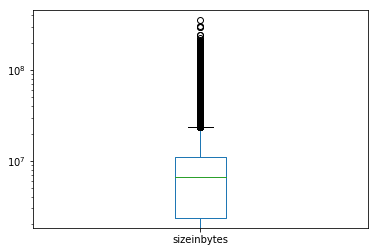

In [98]:
joineddata_with_bitrate_df.sizeinbytes.plot(kind='box')
plt.yscale('log', nonposy='clip')
plt.show()

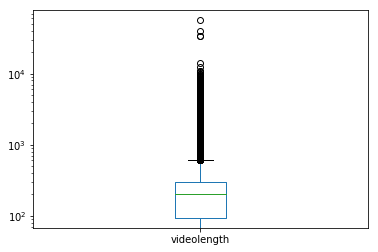

In [99]:
joineddata_with_bitrate_df.videolength.plot(kind='box')
plt.yscale('log', nonposy='clip')
plt.show()

In [128]:
vid_length_mean=joineddata_with_bitrate_df[joineddata_with_bitrate_df.videolength!=0].videolength.mean()
vid_size_mean=joineddata_with_bitrate_df[joineddata_with_bitrate_df.sizeinbytes!=0].sizeinbytes.mean()

In [122]:
vid_bitrate_mean

-1.765820000000001e+308

In [129]:
joineddata_with_bitrate_df.videolength.replace(0,vid_length_mean,inplace=True)
joineddata_with_bitrate_df.sizeinbytes.replace(0,vid_size_mean,inplace=True)

In [130]:
joineddata_with_bitrate_df.to_csv(r'C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\joinedata.csv',index=False)

## We have most of the page ranks distributed with a lower rank. This means that there is lesser influential nodes.

## This was expected because not all nodes will be the most influential and well connected in the network

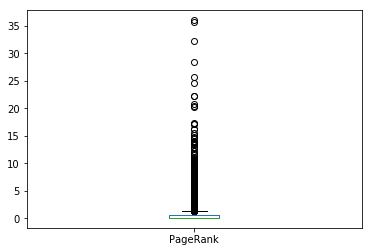

In [132]:
joineddata_with_bitrate_df.PageRank.plot(kind='box')
plt.show()

In [133]:
joineddata_with_bitrate_df

,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments,PageRank,videolength,sizeinbytes
0,c9hk60O9KU8,dewsaw407,782.0,Entertainment,107.0,179823.0,2.18,250.0,129.0,1.10302,107.0,4.372040e+06
1,g6lR2xT0Su4,nogreen8,783.0,Entertainment,48.0,154608.0,1.85,431.0,293.0,0.10000,48.0,1.967244e+06
2,4YHI4oQuli0,chicagopictures,783.0,Entertainment,145.0,133799.0,3.08,722.0,0.0,0.44237,145.0,6.108311e+06
3,fnRb3U6JF8o,funkyapple333,783.0,Comedy,41.0,113263.0,3.45,109.0,49.0,0.10000,41.0,8.922381e+06
4,XUuqKdhKagg,lonelygirl15,783.0,People & Blogs,109.0,109228.0,2.44,738.0,453.0,0.96774,109.0,4.583486e+06
5,PXCJ9GIW8eI,Digermeny,783.0,Comedy,27.0,89006.0,3.38,153.0,71.0,0.10000,27.0,8.922381e+06
6,tUYKYlR5vEs,diethealth,783.0,People & Blogs,103.0,87592.0,4.31,54.0,33.0,1.50772,103.0,4.326203e+06
7,re9BYHWHrT4,vloghog,782.0,Sports,37.0,87469.0,0.00,0.0,145.0,0.10000,37.0,1.473749e+06
8,46EUt9LAEqM,Wowowillie1,783.0,Comedy,109.0,62682.0,4.03,422.0,135.0,0.10000,109.0,8.922381e+06
9,O-TOsPw6gqU,luckysilentshooter,783.0,Pets & Animals,24.0,59145.0,3.91,22.0,29.0,0.10000,24.0,6.505300e+05


In [24]:
import pandas as pd
path=r'C:\Users\visha\Desktop\MSIS\Advanced Data Science\Assignments\Final Assignments\Docker\data\MainFile_W_PR_DEG.csv'
videosdf=pd.read_csv(path,encoding='"ISO-8859-1')

In [25]:
videosdf.category.replace('Nonprofits &amp; Activism','Nonprofits & Activism',inplace=True)
videosdf.category.replace('News &amp; Politics','News & Politics',inplace=True)
videosdf.category.replace('People &amp; Blogs','People & Blogs',inplace=True)
videosdf.category.replace('Film &amp; Animation','Film & Animation',inplace=True)
videosdf.category.replace('Travel &amp; Events','Travel & Events',inplace=True)
videosdf.category.replace('Howto &amp; Style','Howto & Style',inplace=True)
videosdf.category.replace('Pets &amp; Animals','Pets & Animals',inplace=True)
videosdf.category.replace('Autos &amp; Vehicles','Autos & Vehicles',inplace=True)
videosdf.category.replace('Science &amp; Technology','Science & Technology',inplace=True)

In [26]:
videosdf.category.unique()

array(['Entertainment', 'Music', 'Comedy', 'People & Blogs', 'Sports',
       'Film & Animation', 'News & Politics', 'Pets & Animals',
       'Autos & Vehicles', 'Gadgets & Games', 'Howto & DIY',
       'Travel & Places', ' UNA ', 'Science & Technology',
       'Nonprofits & Activism', 'Howto & Style', 'Education',
       'Travel & Events', 'Gaming'], dtype=object)

In [21]:
videosdf.head()

,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments,PageRank,InDegree
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,0.65462,45
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0,0.91563,65
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0,1.06318,94
3,SDNkMu8ZT68,w00dy911,630.0,People & Blogs,186.0,10181.0,3.49,494.0,257.0,0.68903,40
4,sRnLdmvQBsI,pdrop,735.0,Entertainment,188.0,67265.0,3.09,302.0,262.0,0.10000,21


In [28]:
videosdf.to_csv(path,index=False)

In [22]:
videosdf[videosdf['category'].str.contains('&amp')]['category']

6499573          News &amp; Politics
6501054           People &amp; Blogs
6502310           People &amp; Blogs
6506507          News &amp; Politics
6507638           People &amp; Blogs
6507677    Nonprofits &amp; Activism
6509017          News &amp; Politics
6509312           People &amp; Blogs
6509447         Film &amp; Animation
6509874           People &amp; Blogs
6510526         Film &amp; Animation
6511977           People &amp; Blogs
6514976           People &amp; Blogs
6515121          Travel &amp; Events
6517426         Film &amp; Animation
6517598         Film &amp; Animation
6517691         Film &amp; Animation
6518190         Film &amp; Animation
6518748            Howto &amp; Style
6519952           Pets &amp; Animals
6520218         Film &amp; Animation
6521110           Pets &amp; Animals
6523096            Howto &amp; Style
6523594            Howto &amp; Style
6524987           People &amp; Blogs
6527996           People &amp; Blogs
6529613          Travel &amp; Events
6

In [8]:
videosdf[videosdf['category'].str.contains('&amp')]['category']

6499573          News &amp; Politics
6501054           People &amp; Blogs
6502310           People &amp; Blogs
6506507          News &amp; Politics
6507638           People &amp; Blogs
6507677    Nonprofits &amp; Activism
6509017          News &amp; Politics
6509312           People &amp; Blogs
6509447         Film &amp; Animation
6509874           People &amp; Blogs
6510526         Film &amp; Animation
6511977           People &amp; Blogs
6514976           People &amp; Blogs
6515121          Travel &amp; Events
6517426         Film &amp; Animation
6517598         Film &amp; Animation
6517691         Film &amp; Animation
6518190         Film &amp; Animation
6518748            Howto &amp; Style
6519952           Pets &amp; Animals
6520218         Film &amp; Animation
6521110           Pets &amp; Animals
6523096            Howto &amp; Style
6523594            Howto &amp; Style
6524987           People &amp; Blogs
6527996           People &amp; Blogs
6529613          Travel &amp; Events
6